### Introduction

Advertising data (advertising1.csv) contains the advertising costs on various channels: TV, radio, and newspaper. Those may be correlated with the sales number. You will use linear regression models to predict the sales number.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 1: import the libraries and load the data
---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load the csv file into a dataframe variable called "ads"

ads = pd.read_csv("C:/Users/alexm/Downloads/advertising1.csv")

In [3]:
# show the first 5 rows of the dataframe variable "ads"

ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# show the info of this dataframe

ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          198 non-null    float64
 2   radio       198 non-null    float64
 3   newspaper   198 non-null    float64
 4   sales       199 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# show the description of this dataframe

ads.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,198.000000,198.000000,198.000000,199.000000
mean,100.500000,147.145960,23.203030,30.596970,14.000503
std,57.879185,86.282342,14.905046,21.881972,5.221309
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,73.725000,9.925000,12.650000,10.350000
50%,100.500000,150.650000,22.400000,25.750000,12.900000
75%,150.250000,219.475000,36.575000,45.100000,17.350000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Task 2: Clean up the data

In [6]:
# display all the column names

ads.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
# remove the redundant column 'Unnamed: 0' and show the updated dataframe 'ads'

ads = ads.drop(columns=['Unnamed: 0'])

ads

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
# count how many null values in each column, your code should output as the following

print(ads.isnull().sum(axis=0))

TV           2
radio        2
newspaper    2
sales        1
dtype: int64


In [9]:
# show all row index with null values, together with the null count, as the following output

print(ads.isnull().sum(axis=1)[ads.isnull().sum(axis=1) > 0])

14     1
28     1
44     1
59     1
67     1
90     1
106    1
dtype: int64


In [10]:
# display all rows with at least one null value, as the following output

ads[ads.isnull().any(axis=1)]

,TV,radio,newspaper,sales
14,204.1,NaN,46.0,19.0
28,248.8,27.1,NaN,18.9
44,25.1,NaN,43.3,8.5
59,210.7,29.5,9.3,NaN
67,NaN,14.5,10.2,13.4
90,NaN,4.9,9.3,11.2
106,25.0,11.0,NaN,7.2


In [11]:
# fill the null values with the mean value of the column,
# and show only those rows with filled data, as the following output

null_rows = ads[ads.isnull().any(axis=1)].index
ads = ads.fillna(ads.mean())
ads.loc[null_rows]

,TV,radio,newspaper,sales
14,204.10000,23.20303,46.00000,19.000000
28,248.80000,27.10000,30.59697,18.900000
44,25.10000,23.20303,43.30000,8.500000
59,210.70000,29.50000,9.30000,14.000503
67,147.14596,14.50000,10.20000,13.400000
90,147.14596,4.90000,9.30000,11.200000
106,25.00000,11.00000,30.59697,7.200000


In [12]:
# verify the data frame info, make sure all Non-Null count is 200, as the following output.

ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Task 3: Exploratory Data Analysis

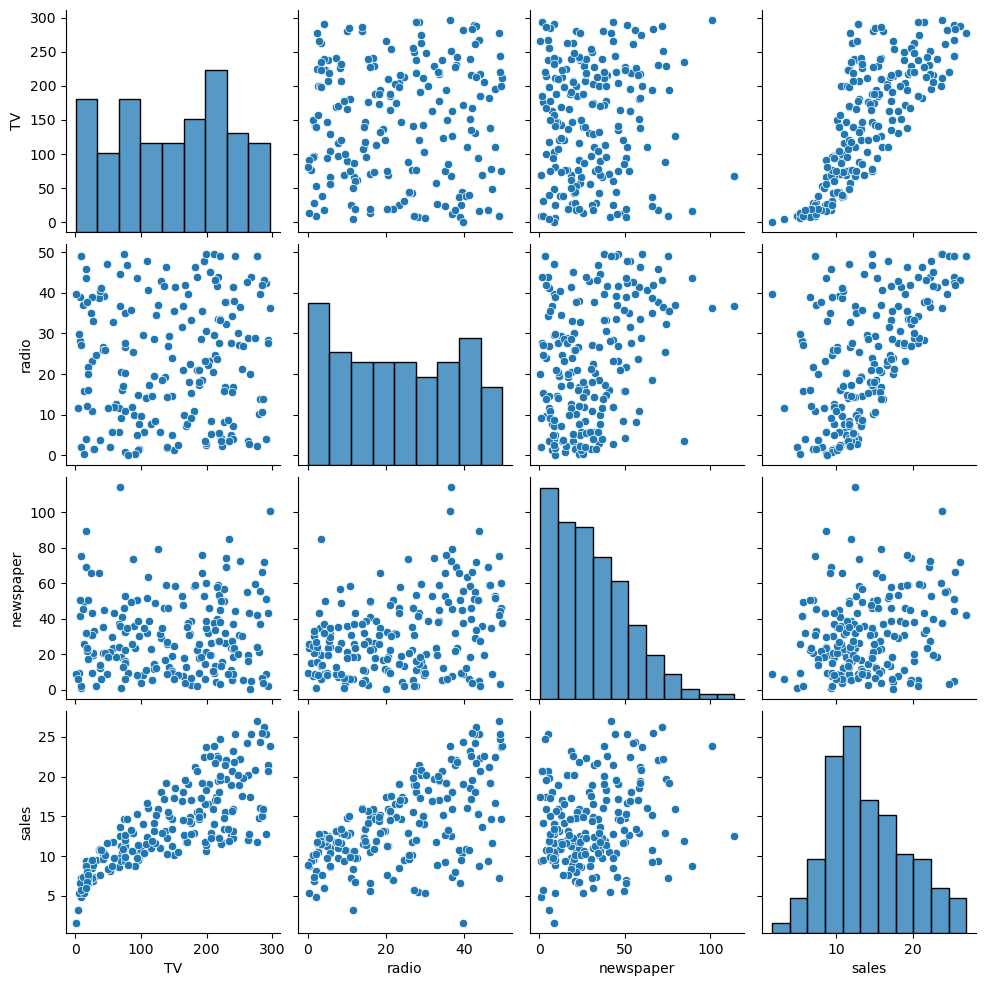

In [13]:
# draw pair plot as the following output

import seaborn as sns

sns.pairplot(ads)

In [14]:
# By looking at the pairplot, in which order the three columns (TV, radio, newspaper) are correlated with the sales number?
# Answer: TV > radio > newspaper
# create the following heap map to show the correlations.

<Axes: >

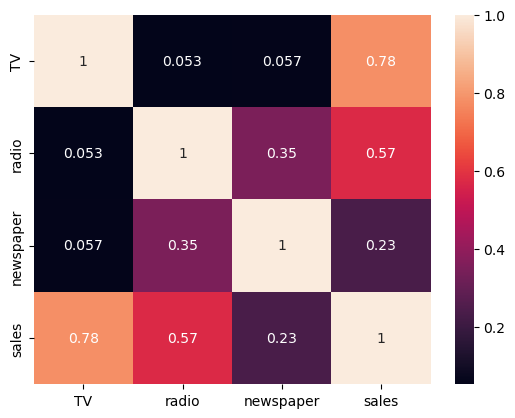

In [15]:
sns.heatmap(ads.corr(), annot=True)

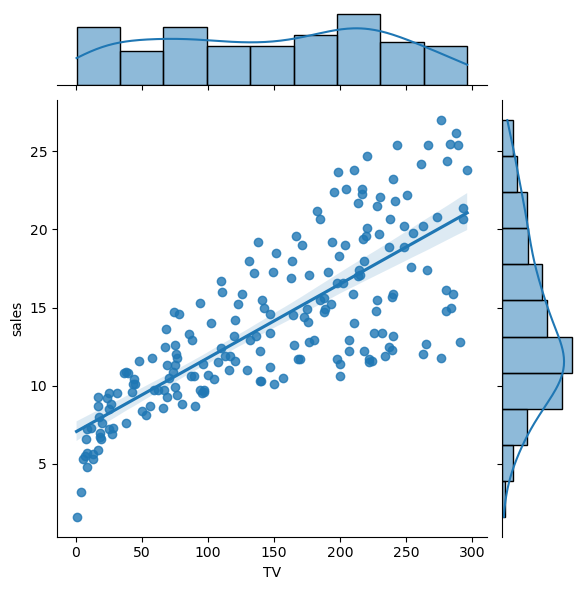

In [16]:
# let's draw the joint plot between TV and sales.

sns.jointplot(x='TV', y='sales', data=ads, kind='reg')

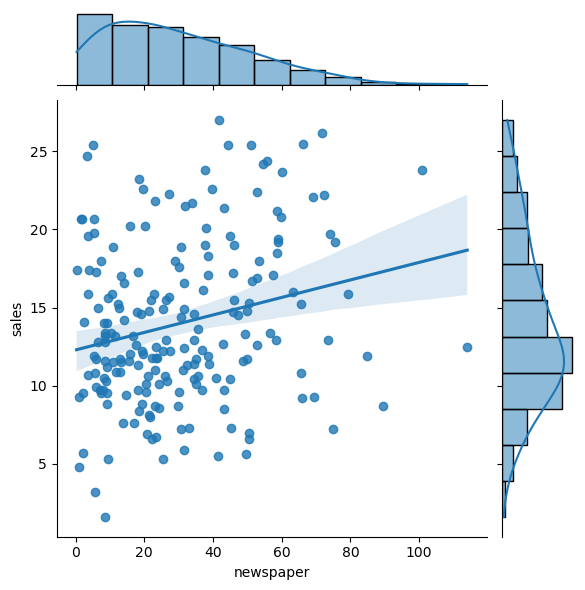

In [17]:
# let's draw the joint plot between newspaper and sales.

sns.jointplot(x='newspaper', y='sales', data=ads, kind='reg')

### Task 4: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the target vector
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the *model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [18]:
# get the feature matrix to X_ads and display as the following output

x_ads = ads[['TV', 'radio', 'newspaper']]

x_ads

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
# get the target vector as the 'sales' column and display as the following output.

print(ads['sales'])

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [20]:
# split the data for training 75% and testing 25% into X_train, X_test, y_train, y_test
# using random_state = 1

from sklearn.model_selection import train_test_split

y_ads = ads['sales']
x_train, x_test, y_train, y_test = train_test_split(x_ads, y_ads, test_size=0.25, random_state=1)


In [21]:
# display the shape of X_train, X_test, y_train, y_test

print(x_train.shape),
print(x_test.shape),
print(y_train.shape),
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [22]:
# create a linear regression model and train with X_train and y_train

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
# show the model parameters: intercept_ and coef_. Your output may not be exactly the same, but should be close.

print(model.intercept_)
print(model.coef_)

2.855590199838973
[0.0465794  0.1794409  0.00366129]


### Task 5: Making Predictions with our Model

In [24]:
# test the model using X_test, save the prediction to variable y_pred, and show the results as the following.
# Your output may not be exactly the same, but should be very close.

y_pred = model.predict(x_test)

y_pred

array([21.71282732, 16.40514794,  7.5915498 , 17.79784338, 18.60937231,
       23.84440381, 16.32602123, 13.42892724,  9.16453104, 17.33448899,
       14.44176182,  9.82442484, 17.17741451, 16.73547379, 15.05149756,
       15.62196444, 12.41849065, 17.16305106, 11.08026785, 17.99742667,
        9.26797543, 12.99859776,  8.34683969, 10.41029861, 11.37800217,
       14.97275886,  9.78274571, 19.41941817, 18.17473275, 17.1198112 ,
       21.54451985, 14.69903662, 16.23859034, 12.31192092, 19.91935297,
       15.31692889, 13.87291121, 10.02037639, 20.93104705,  7.43755045,
        3.63128581,  7.2051424 ,  5.9835341 , 16.69443816,  8.3894865 ,
       14.07530422, 15.02224795, 20.35777701, 20.56891336, 19.6131718 ])

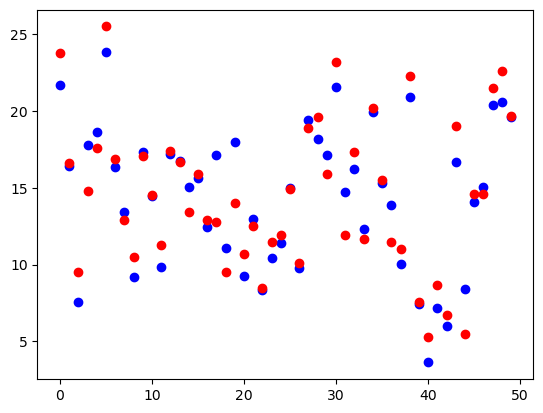

In [25]:
# plot y_pred (blue dots) together with y_test (red dots)

import matplotlib.pyplot as plt

plt.scatter(range(len(y_pred)), y_pred, color='blue'),
plt.scatter(range(len(y_test)), y_test, color='red')

plt.show()

In [26]:
# use numpy function corrcoef to calculate the correlation between y_pred and y_test
# Your output may not be exactly the same, but should be very close.

np.corrcoef(y_test, y_pred)

array([[1.        , 0.94713038],
       [0.94713038, 1.        ]])

### Task 5: Model Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [27]:
# using sklearn functions, calculate the RMSE, MSE, and MAE between y_test and y_pred.
# Your output may not be exactly the same, but should be very close.

from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE =', rmse)
print('MSE =', mse)
print('MAE =', mae)

RMSE = 1.5456614841994927
MSE = 2.3890694237377783
MAE = 1.1735394188994093


In [28]:
# https://en.wikipedia.org/wiki/Coefficient_of_determination
# measure the linear regression model accuracy using r2 score.

# Your output may not be exactly the same, but should be very close.

r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.8965953831587335


### Task 6: Select features to improve the model

In [29]:
# since we already knew that newspaper is not quite correlated with sales, so let's also drop the newspaper column
# the new feature matrix should be saved as X_ads, and show its content as the following output.

x_ads = ads[['TV', 'radio']]

x_ads

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [30]:
# split the data for training 75% and testing 25%, and use random_state = 1
# display the shape of X_train, X_test, y_train, y_test, as the following output.

x_train, x_test, y_train, y_test = train_test_split(x_ads, y_ads, test_size=0.25, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(50, 2)
(150,)
(50,)


In [31]:
# train the model and show the r2 score:

# Your output may not be exactly the same, but should be very close.

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.8978468736099933


In [32]:
# verify the RMSE, MSE, and MAE all improved.
# Your output may not be exactly the same, but should be very close.

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE =', rmse)
print('MSE =', mse)
print('MAE =', mae)

RMSE = 1.5362795570908696
MSE = 2.3601548775353187
MAE = 1.1587821887893934


### Task 7: Extend the linear model to polynomial model

Now let's look at the joint plot between TV and sales again. Pay attention to the left side, it doesn't look like linear. Instead, it looks more like a polynomial. More specifically, it looks like:

<h4 align="center"> $sales = \beta_0 + \beta_1\times TV + \beta_2\times TV^2 + \beta_3\times radio$ </h4>

But how do we continue using the LinearRegression model to fit a polynomial? The trick is to create another column as $TV^2$ and treat it as an independent column, then the model becomes a linear again.

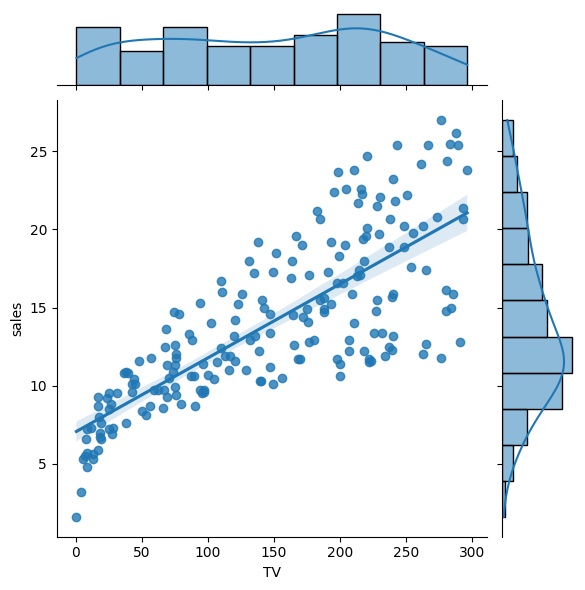

In [33]:
# extend the feature matrix so that it includes another column TV2 as TV*TV
# save your new feature matrix as X_ads and display its content as the following output.

# Your output may not be exactly the same, but should be very close.

x_ads = ads[['TV', 'radio']].copy()
x_ads['TV2'] = x_ads['TV'] ** 2

x_ads

,TV,radio,TV2
0,230.1,37.8,52946.01
1,44.5,39.3,1980.25
2,17.2,45.9,295.84
3,151.5,41.3,22952.25
4,180.8,10.8,32688.64
...,...,...,...
195,38.2,3.7,1459.24
196,94.2,4.9,8873.64
197,177.0,9.3,31329.00
198,283.6,42.0,80428.96


In [34]:
# split the train/test data as 75%:25% using random_state = 1, and show their shapes.
# X_train, X_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x_ads, y_ads, test_size=0.25, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [35]:
# train the model and measure the r2 score:
# Your output may not be exactly the same, but should be very close.

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.9150740200981555


In [36]:
# verify the RMSE, MSE, and MAE all improved.
# Your output may not be exactly the same, but should be very close.

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE =', rmse)
print('MSE =', mse)
print('MAE =', mae)

RMSE = 1.4007631347409375
MSE = 1.9621373596492577
MAE = 1.0907592554352683


That's quite a lot improvements!

### Task 8: Extend polynomial model further

We can reasonably guess that TV and radio together may boost the sales even more, so we try to add another term in this model:
<h4 align="center"> $sales = \beta_0 + \beta_1\times TV + \beta_2\times TV^2 + \beta_3\times radio + \beta_4\times TV\times radio$ </h4>

In [37]:
# extend the feature matrix so that it includes another column 'TR' as TV*radio
# save the new feature matrix as X_ads and show its content as the following output

# Your output may not be exactly the same, but should be very close.

x_ads = ads[['TV', 'radio']].copy()
x_ads['TV2'] = x_ads['TV'] ** 2
x_ads['TR'] = x_ads['TV'] * x_ads['radio']

x_ads

,TV,radio,TV2,TR
0,230.1,37.8,52946.01,8697.78
1,44.5,39.3,1980.25,1748.85
2,17.2,45.9,295.84,789.48
3,151.5,41.3,22952.25,6256.95
4,180.8,10.8,32688.64,1952.64
...,...,...,...,...
195,38.2,3.7,1459.24,141.34
196,94.2,4.9,8873.64,461.58
197,177.0,9.3,31329.00,1646.10
198,283.6,42.0,80428.96,11911.20


In [38]:
# split the train/test data as 75%:25% using random_state = 1, and show their shapes.
# X_train, X_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x_ads, y_ads, test_size=0.25, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 4)
(50, 4)
(150,)
(50,)


In [39]:
# train the model and measure the r2 score:
# Your output may not be exactly the same, but should be very close.

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.968610588345914


In [40]:
# verify the RMSE, MSE, and MAE all improved.
# Your output may not be exactly the same, but should be very close.

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE =', rmse)
print('MSE =', mse)
print('MAE =', mae)

RMSE = 0.8516006965209975
MSE = 0.725223746315048
MAE = 0.4631194026788371


That's a huge improvement!

### Task 9: Use grid search and cross-validation to find the best model.

Can this manual selection be done automatically?

In [41]:
# setup a function to create polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [42]:
# create the search grid with
# polynomialfeatures__degree from 0 to 9, and
# linearregression__fit_intercept True or False
# cross validation has 5 splits.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'polynomialfeatures__degree': range(0, 10),
    'linearregression__fit_intercept': [True, False]
}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)

grid


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': range(0, 10)})

In [43]:
# your grid should look like the following output.
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': range(0, 10)})

In [44]:
# reset X_ads with only TV and radio columns.

x_ads = ads[['TV', 'radio']]

# split data to 75%:25% for train:test with random_state = 1, and search the grid.

x_train, x_test, y_train, y_test = train_test_split(x_ads, y_ads, test_size=0.25, random_state=1)

grid.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': range(0, 10)})

In [45]:
# your grid should find the optimal superparameters, similar to the following.
# It may not be the exact same as the following output.

grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 5}

In [46]:
# retrieve the best model from the grid

model = grid.best_estimator_
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [47]:
# train this model using the training data, then use it to predict with the test data
# the prediction should be saved in y_pred
# then verify r2 score is improved. Your output may be slightly different, but very close.


model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.9746605881209531


In [48]:
# verify the RMSE, MSE, and MAE all improved.
# Your output may not be exactly the same, but should be very close.

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE =', rmse)
print('MSE =', mse)
print('MAE =', mae)

RMSE = 0.7651431341907214
MSE = 0.5854440157992004
MAE = 0.369545760792218


### The end.